# Project: Wrangling and Analyze Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import io
import tweepy
import json
from timeit import default_timer as timer
import re
import datetime

%matplotlib inline

## Data Gathering

### Read the downloaded `twitter_archive_enhanced.csv` file from disk.

In [2]:
df_archive = pd.read_csv('twitter_archive_enhanced.csv')
df_archive.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


### Download `image_predications.tsv` from udacity server

In [3]:
# Using the request library to download 'image_predications.tsv' file online.
image_prediction_url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(image_prediction_url)
response.status_code

200

In [4]:
# Get text in file using response.text
response_text = response.text

# Read text data into pandas DataFrame
df_ipred = pd.read_csv(io.StringIO(response_text), sep='\t') # df_ipred -> dataframe_imageprediction
df_ipred.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


In [5]:
# Save text file locally to 'image_predictions.tsv'
with open('image_predictions.tsv', 'w') as f:
    f.write(response_text)
    
# Making sure file is saved
with open('image_predictions.tsv') as f:
    print(f.readline())

tweet_id	jpg_url	img_num	p1	p1_conf	p1_dog	p2	p2_conf	p2_dog	p3	p3_conf	p3_dog



### Using `tweepy` library to query additional data via Twitter API and save json to `tweet_json.txt`

In [6]:
# Authenticating tweepy api with consumer and access keys and secrets gotten from my twitter developer dashboard.
# Not keys and secrets not included here for security reasons.

consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [7]:
# Downloading and saving each tweet_json in a 'tweet_json.txt' file
#
# NOTE: authenticated 'api' object has been created initially

errors = [] # A list that holds all encountered errors

timer_start = timer()
with open('tweet_json.txt', 'w') as f:
    # Looping through the tweet_ids in the df_archive dataframe and download tweet_json
    for index, tweet_id in enumerate(df_archive.tweet_id):
        try:
            # api.get_status(_id) returns a 'tweepy.models.Status' that I can access using the dot('.') operator
            # while adding a '._json' returns just the json part as a python dictionary
            tweet_json = api.get_status(tweet_id)._json

        except Exception as e:
            # Append error
            errors.append('{}: {}, tweeet_id: {}'.format(type(e).__name__, e.args, tweet_id))

        else:
            # Writing data to file
            json.dump(tweet_json, f)
            f.write('\n')

        finally:
            print('index: {}, tweet_id: {}'.format(index, tweet_id))

timer_end = timer()
print(timer_end - timer_start)

index: 0, tweet_id: 892420643555336193
index: 1, tweet_id: 892177421306343426
index: 2, tweet_id: 891815181378084864
index: 3, tweet_id: 891689557279858688
index: 4, tweet_id: 891327558926688256
index: 5, tweet_id: 891087950875897856
index: 6, tweet_id: 890971913173991426
index: 7, tweet_id: 890729181411237888
index: 8, tweet_id: 890609185150312448
index: 9, tweet_id: 890240255349198849
index: 10, tweet_id: 890006608113172480
index: 11, tweet_id: 889880896479866881
index: 12, tweet_id: 889665388333682689
index: 13, tweet_id: 889638837579907072
index: 14, tweet_id: 889531135344209921
index: 15, tweet_id: 889278841981685760
index: 16, tweet_id: 888917238123831296
index: 17, tweet_id: 888804989199671297
index: 18, tweet_id: 888554962724278272
index: 19, tweet_id: 888202515573088257
index: 20, tweet_id: 888078434458587136
index: 21, tweet_id: 887705289381826560
index: 22, tweet_id: 887517139158093824
index: 23, tweet_id: 887473957103951883
index: 24, tweet_id: 887343217045368832
index: 25,

index: 203, tweet_id: 853299958564483072
index: 204, tweet_id: 852936405516943360
index: 205, tweet_id: 852912242202992640
index: 206, tweet_id: 852672615818899456
index: 207, tweet_id: 852553447878664193
index: 208, tweet_id: 852311364735569921
index: 209, tweet_id: 852226086759018497
index: 210, tweet_id: 852189679701164033
index: 211, tweet_id: 851953902622658560
index: 212, tweet_id: 851861385021730816
index: 213, tweet_id: 851591660324737024
index: 214, tweet_id: 851464819735769094
index: 215, tweet_id: 851224888060895234
index: 216, tweet_id: 850753642995093505
index: 217, tweet_id: 850380195714523136
index: 218, tweet_id: 850333567704068097
index: 219, tweet_id: 850145622816686080
index: 220, tweet_id: 850019790995546112
index: 221, tweet_id: 849776966551130114
index: 222, tweet_id: 849668094696017920
index: 223, tweet_id: 849412302885593088
index: 224, tweet_id: 849336543269576704
index: 225, tweet_id: 849051919805034497
index: 226, tweet_id: 848690551926992896
index: 227, twee

index: 403, tweet_id: 824297048279236611
index: 404, tweet_id: 824025158776213504
index: 405, tweet_id: 823939628516474880
index: 406, tweet_id: 823719002937630720
index: 407, tweet_id: 823699002998870016
index: 408, tweet_id: 823581115634085888
index: 409, tweet_id: 823333489516937216
index: 410, tweet_id: 823322678127919110
index: 411, tweet_id: 823269594223824897
index: 412, tweet_id: 822975315408461824
index: 413, tweet_id: 822872901745569793
index: 414, tweet_id: 822859134160621569
index: 415, tweet_id: 822647212903690241
index: 416, tweet_id: 822610361945911296
index: 417, tweet_id: 822489057087389700
index: 418, tweet_id: 822462944365645825
index: 419, tweet_id: 822244816520155136
index: 420, tweet_id: 822163064745328640
index: 421, tweet_id: 821886076407029760
index: 422, tweet_id: 821813639212650496
index: 423, tweet_id: 821765923262631936
index: 424, tweet_id: 821522889702862852
index: 425, tweet_id: 821421320206483457
index: 426, tweet_id: 821407182352777218
index: 427, twee

index: 603, tweet_id: 798628517273620480
index: 604, tweet_id: 798585098161549313
index: 605, tweet_id: 798576900688019456
index: 606, tweet_id: 798340744599797760
index: 607, tweet_id: 798209839306514432
index: 608, tweet_id: 797971864723324932
index: 609, tweet_id: 797545162159308800
index: 610, tweet_id: 797236660651966464
index: 611, tweet_id: 797165961484890113
index: 612, tweet_id: 796904159865868288
index: 613, tweet_id: 796865951799083009
index: 614, tweet_id: 796759840936919040
index: 615, tweet_id: 796563435802726400
index: 616, tweet_id: 796484825502875648
index: 617, tweet_id: 796387464403357696
index: 618, tweet_id: 796177847564038144
index: 619, tweet_id: 796149749086875649
index: 620, tweet_id: 796125600683540480
index: 621, tweet_id: 796116448414461957
index: 622, tweet_id: 796080075804475393
index: 623, tweet_id: 796031486298386433
index: 624, tweet_id: 795464331001561088
index: 625, tweet_id: 795400264262053889
index: 626, tweet_id: 795076730285391872
index: 627, twee

index: 803, tweet_id: 772152991789019136
index: 804, tweet_id: 772117678702071809
index: 805, tweet_id: 772114945936949249
index: 806, tweet_id: 772102971039580160
index: 807, tweet_id: 771908950375665664
index: 808, tweet_id: 771770456517009408
index: 809, tweet_id: 771500966810099713
index: 810, tweet_id: 771380798096281600
index: 811, tweet_id: 771171053431250945
index: 812, tweet_id: 771136648247640064
index: 813, tweet_id: 771102124360998913
index: 814, tweet_id: 771014301343748096
index: 815, tweet_id: 771004394259247104
index: 816, tweet_id: 770787852854652928
index: 817, tweet_id: 770772759874076672
index: 818, tweet_id: 770743923962707968
index: 819, tweet_id: 770655142660169732
index: 820, tweet_id: 770414278348247044
index: 821, tweet_id: 770293558247038976
index: 822, tweet_id: 770093767776997377
index: 823, tweet_id: 770069151037685760
index: 824, tweet_id: 769940425801170949
index: 825, tweet_id: 769695466921623552
index: 826, tweet_id: 769335591808995329
index: 827, twee

index: 1003, tweet_id: 747844099428986880
index: 1004, tweet_id: 747816857231626240
index: 1005, tweet_id: 747651430853525504
index: 1006, tweet_id: 747648653817413632
index: 1007, tweet_id: 747600769478692864
index: 1008, tweet_id: 747594051852075008
index: 1009, tweet_id: 747512671126323200
index: 1010, tweet_id: 747461612269887489
index: 1011, tweet_id: 747439450712596480
index: 1012, tweet_id: 747242308580548608
index: 1013, tweet_id: 747219827526344708
index: 1014, tweet_id: 747204161125646336
index: 1015, tweet_id: 747103485104099331
index: 1016, tweet_id: 746906459439529985
index: 1017, tweet_id: 746872823977771008
index: 1018, tweet_id: 746818907684614144
index: 1019, tweet_id: 746790600704425984
index: 1020, tweet_id: 746757706116112384
index: 1021, tweet_id: 746726898085036033
index: 1022, tweet_id: 746542875601690625
index: 1023, tweet_id: 746521445350707200
index: 1024, tweet_id: 746507379341139972
index: 1025, tweet_id: 746369468511756288
index: 1026, tweet_id: 74613187708

index: 1199, tweet_id: 716791146589110272
index: 1200, tweet_id: 716730379797970944
index: 1201, tweet_id: 716447146686459905
index: 1202, tweet_id: 716439118184652801
index: 1203, tweet_id: 716285507865542656
index: 1204, tweet_id: 716080869887381504
index: 1205, tweet_id: 715928423106027520
index: 1206, tweet_id: 715758151270801409
index: 1207, tweet_id: 715733265223708672
index: 1208, tweet_id: 715704790270025728
index: 1209, tweet_id: 715696743237730304
index: 1210, tweet_id: 715680795826982913
index: 1211, tweet_id: 715360349751484417
index: 1212, tweet_id: 715342466308784130
index: 1213, tweet_id: 715220193576927233
index: 1214, tweet_id: 715200624753819648
index: 1215, tweet_id: 715009755312439296
index: 1216, tweet_id: 714982300363173890
index: 1217, tweet_id: 714962719905021952
index: 1218, tweet_id: 714957620017307648
index: 1219, tweet_id: 714631576617938945
index: 1220, tweet_id: 714606013974974464
index: 1221, tweet_id: 714485234495041536
index: 1222, tweet_id: 71425825879

index: 1395, tweet_id: 699801817392291840
index: 1396, tweet_id: 699788877217865730
index: 1397, tweet_id: 699779630832685056
index: 1398, tweet_id: 699775878809702401
index: 1399, tweet_id: 699691744225525762
index: 1400, tweet_id: 699446877801091073
index: 1401, tweet_id: 699434518667751424
index: 1402, tweet_id: 699423671849451520
index: 1403, tweet_id: 699413908797464576
index: 1404, tweet_id: 699370870310113280
index: 1405, tweet_id: 699323444782047232
index: 1406, tweet_id: 699088579889332224
index: 1407, tweet_id: 699079609774645248
index: 1408, tweet_id: 699072405256409088
index: 1409, tweet_id: 699060279947165696
index: 1410, tweet_id: 699036661657767936
index: 1411, tweet_id: 698989035503689728
index: 1412, tweet_id: 698953797952008193
index: 1413, tweet_id: 698907974262222848
index: 1414, tweet_id: 698710712454139905
index: 1415, tweet_id: 698703483621523456
index: 1416, tweet_id: 698635131305795584
index: 1417, tweet_id: 698549713696649216
index: 1418, tweet_id: 69835567042

index: 1591, tweet_id: 686606069955735556
index: 1592, tweet_id: 686394059078897668
index: 1593, tweet_id: 686386521809772549
index: 1594, tweet_id: 686377065986265092
index: 1595, tweet_id: 686358356425093120
index: 1596, tweet_id: 686286779679375361
index: 1597, tweet_id: 686050296934563840
index: 1598, tweet_id: 686035780142297088
index: 1599, tweet_id: 686034024800862208
index: 1600, tweet_id: 686007916130873345
index: 1601, tweet_id: 686003207160610816
index: 1602, tweet_id: 685973236358713344
index: 1603, tweet_id: 685943807276412928
index: 1604, tweet_id: 685906723014619143
index: 1605, tweet_id: 685681090388975616
index: 1606, tweet_id: 685667379192414208
index: 1607, tweet_id: 685663452032069632
index: 1608, tweet_id: 685641971164143616
index: 1609, tweet_id: 685547936038666240
index: 1610, tweet_id: 685532292383666176
index: 1611, tweet_id: 685325112850124800
index: 1612, tweet_id: 685321586178670592
index: 1613, tweet_id: 685315239903100929
index: 1614, tweet_id: 68530745170

index: 1787, tweet_id: 677565715327688705
index: 1788, tweet_id: 677557565589463040
index: 1789, tweet_id: 677547928504967168
index: 1790, tweet_id: 677530072887205888
index: 1791, tweet_id: 677335745548390400
index: 1792, tweet_id: 677334615166730240
index: 1793, tweet_id: 677331501395156992
index: 1794, tweet_id: 677328882937298944
index: 1795, tweet_id: 677314812125323265
index: 1796, tweet_id: 677301033169788928
index: 1797, tweet_id: 677269281705472000
index: 1798, tweet_id: 677228873407442944
index: 1799, tweet_id: 677187300187611136
index: 1800, tweet_id: 676975532580409345
index: 1801, tweet_id: 676957860086095872
index: 1802, tweet_id: 676949632774234114
index: 1803, tweet_id: 676948236477857792
index: 1804, tweet_id: 676946864479084545
index: 1805, tweet_id: 676942428000112642
index: 1806, tweet_id: 676936541936185344
index: 1807, tweet_id: 676916996760600576
index: 1808, tweet_id: 676897532954456065
index: 1809, tweet_id: 676864501615042560
index: 1810, tweet_id: 67682195804

index: 1983, tweet_id: 672964561327235073
index: 1984, tweet_id: 672902681409806336
index: 1985, tweet_id: 672898206762672129
index: 1986, tweet_id: 672884426393653248
index: 1987, tweet_id: 672877615439593473
index: 1988, tweet_id: 672834301050937345
index: 1989, tweet_id: 672828477930868736
index: 1990, tweet_id: 672640509974827008
index: 1991, tweet_id: 672622327801233409
index: 1992, tweet_id: 672614745925664768
index: 1993, tweet_id: 672609152938721280
index: 1994, tweet_id: 672604026190569472
index: 1995, tweet_id: 672594978741354496
index: 1996, tweet_id: 672591762242805761
index: 1997, tweet_id: 672591271085670400
index: 1998, tweet_id: 672538107540070400
index: 1999, tweet_id: 672523490734551040
index: 2000, tweet_id: 672488522314567680
index: 2001, tweet_id: 672482722825261057
index: 2002, tweet_id: 672481316919734272
index: 2003, tweet_id: 672475084225949696
index: 2004, tweet_id: 672466075045466113
index: 2005, tweet_id: 672272411274932228
index: 2006, tweet_id: 67226757091

index: 2180, tweet_id: 669000397445533696
index: 2181, tweet_id: 668994913074286592
index: 2182, tweet_id: 668992363537309700
index: 2183, tweet_id: 668989615043424256
index: 2184, tweet_id: 668988183816871936
index: 2185, tweet_id: 668986018524233728
index: 2186, tweet_id: 668981893510119424
index: 2187, tweet_id: 668979806671884288
index: 2188, tweet_id: 668975677807423489
index: 2189, tweet_id: 668967877119254528
index: 2190, tweet_id: 668960084974809088
index: 2191, tweet_id: 668955713004314625
index: 2192, tweet_id: 668932921458302977
index: 2193, tweet_id: 668902994700836864
index: 2194, tweet_id: 668892474547511297
index: 2195, tweet_id: 668872652652679168
index: 2196, tweet_id: 668852170888998912
index: 2197, tweet_id: 668826086256599040
index: 2198, tweet_id: 668815180734689280
index: 2199, tweet_id: 668779399630725120
index: 2200, tweet_id: 668655139528511488
index: 2201, tweet_id: 668645506898350081
index: 2202, tweet_id: 668643542311546881
index: 2203, tweet_id: 66864110908

In [8]:
errors

["TweepError: ([{'code': 144, 'message': 'No status found with that ID.'}],), tweeet_id: 888202515573088257",
 "TweepError: ([{'code': 144, 'message': 'No status found with that ID.'}],), tweeet_id: 873697596434513921",
 "TweepError: ([{'code': 144, 'message': 'No status found with that ID.'}],), tweeet_id: 872668790621863937",
 "TweepError: ([{'code': 144, 'message': 'No status found with that ID.'}],), tweeet_id: 872261713294495745",
 "TweepError: ([{'code': 144, 'message': 'No status found with that ID.'}],), tweeet_id: 869988702071779329",
 "TweepError: ([{'code': 144, 'message': 'No status found with that ID.'}],), tweeet_id: 866816280283807744",
 "TweepError: ([{'code': 144, 'message': 'No status found with that ID.'}],), tweeet_id: 861769973181624320",
 "TweepError: ([{'code': 144, 'message': 'No status found with that ID.'}],), tweeet_id: 856602993587888130",
 "TweepError: ([{'code': 34, 'message': 'Sorry, that page does not exist.'}],), tweeet_id: 856330835276025856",
 "TweepE

In [9]:
# Reading the 'tweet_json.txt' file into df_rt_fav
df_rt_fav = pd.DataFrame(columns=['tweet_id', 'retweet_count', 'favorite_count'])

with open('tweet_json.txt', 'r') as f:
    for line in f:
        data = json.loads(line)
        tweet_json = {}
        tweet_json['tweet_id'] = data['id']
        tweet_json['retweet_count'] = data['retweet_count']
        tweet_json['favorite_count'] = data['favorite_count']
        
        df_rt_fav = df_rt_fav.append(tweet_json, ignore_index=True)

df_rt_fav = df_rt_fav.astype(np.int64)
df_rt_fav.head(2)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7167,34466
1,892177421306343426,5387,29874


## Assessing Data
### `df_archive` accessing

In [10]:
# I have exported the `twitter_archive_enhanced.csv` to google sheet for better visualization
#
# Now trying to get more about the datatypes for each columns 
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [11]:
df_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [12]:
# I can see a couple of really high numerators and denominators, let's query this and export to google sheets for a better 
# visuals of this columns.
df_archive.query('rating_denominator > 10 or rating_numerator > 20').to_csv('data_issues.csv')

In [13]:
# Looking for duplicate tweets
df_archive.tweet_id.duplicated().value_counts()

False    2356
Name: tweet_id, dtype: int64

In [14]:
# View values in `source` column
df_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

### `df_ipred` accessing

In [15]:
# Visualing a sample of df_ipred DataFrame
df_ipred.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
22,666337882303524864,https://pbs.twimg.com/media/CT9OwFIWEAMuRje.jpg,1,ox,0.416669,False,Newfoundland,0.278407,True,groenendael,0.102643,True
1858,841833993020538882,https://pbs.twimg.com/ext_tw_video_thumb/81742...,1,ice_bear,0.336200,False,Samoyed,0.201358,True,Eskimo_dog,0.186789,True
1412,770787852854652928,https://pbs.twimg.com/media/CrJjdZmXgAEWLSD.jpg,1,Bernese_mountain_dog,0.787812,True,Greater_Swiss_Mountain_dog,0.163946,True,EntleBucher,0.020293,True
900,699801817392291840,https://pbs.twimg.com/media/CbYyCMcWIAAHHjF.jpg,2,golden_retriever,0.808978,True,Irish_setter,0.042428,True,Labrador_retriever,0.023536,True
1480,780858289093574656,https://pbs.twimg.com/media/CtYqeNHWgAATqYZ.jpg,1,Chesapeake_Bay_retriever,0.488555,True,Sussex_spaniel,0.271655,True,kelpie,0.106913,True
1414,771014301343748096,https://pbs.twimg.com/media/CrMxZzgWIAQUxzx.jpg,1,meerkat,0.202335,False,doormat,0.111790,False,macaque,0.088925,False
765,689143371370250240,https://pbs.twimg.com/media/CZBUO2UWsAAKehS.jpg,1,English_springer,0.303781,True,papillon,0.165132,True,Welsh_springer_spaniel,0.149051,True
1593,798694562394996736,https://pbs.twimg.com/media/Cbs3DOAXIAAp3Bd.jpg,1,Chihuahua,0.615163,True,Pembroke,0.159509,True,basenji,0.084466,True
1250,747885874273214464,https://pbs.twimg.com/media/CmEGMSvUYAAl3ZM.jpg,1,kuvasz,0.408450,True,Samoyed,0.141330,True,pug,0.083018,True
934,703382836347330562,https://pbs.twimg.com/media/CcLq7ipW4AArSGZ.jpg,2,golden_retriever,0.945664,True,standard_poodle,0.014392,True,Tibetan_mastiff,0.012022,True


In [16]:
df_ipred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [17]:
df_ipred.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [18]:
# Looking for duplicate tweets
df_ipred.tweet_id.duplicated().value_counts()

False    2075
Name: tweet_id, dtype: int64

### `df_rt_fav` accessing

In [19]:
# Visualizing 10 sample from df_rt_fav DataFrame
df_rt_fav.sample(10)

,tweet_id,retweet_count,favorite_count
1374,699423671849451520,301,1280
1640,682638830361513985,555,1952
386,824297048279236611,3656,14510
1320,704347321748819968,324,1490
1442,694001791655137281,954,3219
739,778396591732486144,11589,0
1963,672614745925664768,527,1114
2260,667174963120574464,70,223
845,761745352076779520,820,4105
1899,674045139690631169,579,1294


In [20]:
df_rt_fav.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
tweet_id          2327 non-null int64
retweet_count     2327 non-null int64
favorite_count    2327 non-null int64
dtypes: int64(3)
memory usage: 54.6 KB


In [21]:
df_rt_fav.describe()

,tweet_id,retweet_count,favorite_count
count,2.327000e+03,2327.000000,2327.000000
mean,7.418335e+17,2529.240653,7196.353674
std,6.824532e+16,4281.352850,11176.171705
min,6.660209e+17,1.000000,0.000000
25%,6.781394e+17,511.500000,1250.000000
50%,7.178418e+17,1178.000000,3114.000000
75%,7.986692e+17,2925.500000,8780.500000
max,8.924206e+17,72461.000000,147735.000000


### Quality issues
1. Drop retweets and replys

2. `NaN` values in columns `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id` and `retweeted_status_timestamp` in `df_archive`.

3. Missing values in `expanded_urls` in `df_archive`.

4. `timestamp` is of dtype `string` instead of `date_time` in `df_archive`

5. `source` should be `categorical` instead of `string` dtype in `df_archive`.

6. Rate is 13/10 not 960/00 for tweet with id `835246439529840640` in `df_archive`.

7. Date used as rate for tweet with id `832088576586297345` in `df_archive`.

8. 24/7 not a rate for tweet with id `810984652412424192` in `df_archive`.

9. Rate should be 9.75/10 not 75/10 for tweet with ids `[832215909146226688, 786709082849828864]` and 11.27/10 not 27/10 for tweet with id `778027034220126208`, 11.26/10 not 26/10 for tweet with id `680494726643068929` in `df_archive`.

10. Multiple rating for tweet with id `775096608509886464`, 9/11 and 14/10 in `df_archive`.

11. Tweet `740373189193256964` and `775096608509886464` are the same. `775096608509886464` is a retweet of `740373189193256964` in `df_archive`.

12. Multiple rating for tweet with id `722974582966214656` in `df_archive`.

13. 50/50 and 7/11 not a rate, rate should be 11/10 and 10/10 respectively for tweets with ids `716439118184652801` and `682962037429899265` in `df_archive`.

14. `None` in columns `name`, `doggo`, `floofer`, `pupper` and `puppo` in `df_archive`.

15. `None` in columns instead of `NaN` for missing values [`name`, `dog_stage`].

### Tidiness issues
1. `doggo`, `floofer`, `pupper` and `puppo` should be under one variable name `dog_stage`.

2. `df_ipred` should be modified to `prediction_no`, `prediction`, `confidence` and `is_dog`.

3. Merge `df_rt_fav` with `df_archive`.

4. Multiple values in `expanded_url`.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [22]:
# Making copies of original dataframes
df_archive_copy = df_archive.copy()
df_ipred_copy = df_ipred.copy()
df_rt_fav_copy = df_rt_fav.copy()

### Issue #1 (Quality):
#### Define: Drop retweets and reply
> Tweets with `in_reply_to_status_id` and `retweeted_status_id` are retweets and not original tweets so we can use this column to drop rows that are retweets.
>
> Afterwards we can drop the columns `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id` and `retweeted_status_timestamp` since thay are all linked to retweets.

#### Code

In [23]:
# query for rows where in_reply_to_status_id and retweeted_status_id is not NaN
nan = np.nan

# NaN is not equal to NaN, then query for where in_reply_to_status_id == in_reply_to_status_id while omit the nan values
# This applies to retweeted_status_id
index_to_drop = df_archive_copy.query('in_reply_to_status_id == in_reply_to_status_id or retweeted_status_id == retweeted_status_id').index
df_archive_copy.drop(index=index_to_drop, inplace=True)

#### Test

In [24]:
df_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null object
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: float64(4), int64(3), object(10)

#### Code

In [25]:
# Awesom! Retweets dropped
#
# Now drop `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`
# and `retweeted_status_timestamp` columns since they are linked to retweets

columns_to_drop = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']
df_archive_copy.drop(columns=columns_to_drop, inplace=True)

#### Test

In [26]:
df_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


### Issue #2 (Quality):
#### Define: Missing values in `expanded_urls` in `df_archive`
> Drop rows with missing `expanded_urls` since these tweets have no image in them.

#### Code

In [27]:
# Get row index to drop
index_to_drop = df_archive_copy.query('expanded_urls != expanded_urls').index
df_archive_copy.drop(index=index_to_drop, inplace=True)

#### Test

In [28]:
df_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2094 non-null int64
timestamp             2094 non-null object
source                2094 non-null object
text                  2094 non-null object
expanded_urls         2094 non-null object
rating_numerator      2094 non-null int64
rating_denominator    2094 non-null int64
name                  2094 non-null object
doggo                 2094 non-null object
floofer               2094 non-null object
pupper                2094 non-null object
puppo                 2094 non-null object
dtypes: int64(3), object(9)
memory usage: 212.7+ KB


### Issue #3 (Quality):
#### Define: `timestamp` is of dtype `string` instead of `date_time` in `df_archive`
> Change `timestamp` datatype to `datetime`.

#### Code

In [29]:
df_archive_copy.timestamp = pd.to_datetime(df_archive_copy.timestamp)

#### Test

In [30]:
df_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2094 non-null int64
timestamp             2094 non-null datetime64[ns]
source                2094 non-null object
text                  2094 non-null object
expanded_urls         2094 non-null object
rating_numerator      2094 non-null int64
rating_denominator    2094 non-null int64
name                  2094 non-null object
doggo                 2094 non-null object
floofer               2094 non-null object
pupper                2094 non-null object
puppo                 2094 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 212.7+ KB


### Issue #4 (Quality):
#### Define: `source` should be `categorical` instead of `string` dtype in `df_archive`
> Extract main string from `source` and the change datatype to `category`

#### Code

In [31]:
# Extracting main string from source

"""
ext_function: Extracts string from source.

Keyword arguments:
source_str -- The source sting from df_archive
"""
ext_function = lambda source_str: source_str[source_str.index('>') + 1:source_str.index('</')]

# Apply ext_function to df_archive.source


df_archive_copy.source = df_archive_copy.source.apply(ext_function)

In [32]:
# Change type to category using pd.Series.astype()
df_archive_copy.source = df_archive_copy.source.astype('category')

#### Test

In [33]:
df_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2094 non-null int64
timestamp             2094 non-null datetime64[ns]
source                2094 non-null category
text                  2094 non-null object
expanded_urls         2094 non-null object
rating_numerator      2094 non-null int64
rating_denominator    2094 non-null int64
name                  2094 non-null object
doggo                 2094 non-null object
floofer               2094 non-null object
pupper                2094 non-null object
puppo                 2094 non-null object
dtypes: category(1), datetime64[ns](1), int64(3), object(7)
memory usage: 198.5+ KB


In [34]:
df_archive_copy.source.value_counts()

Twitter for iPhone     1962
Vine - Make a Scene      91
Twitter Web Client       30
TweetDeck                11
Name: source, dtype: int64

### Issue #5 (Quality):
#### Define: Incorrect `rating_numerator` and `rating_denominator` values

In [35]:
# Tweet ids for tweets with incorrect rating
tweet_id_incorrect_ratings = [835246439529840640, 832088576586297345, 810984652412424192, 832215909146226688, 786709082849828864, 778027034220126208, 680494726643068929, 775096608509886464, 740373189193256964, 775096608509886464, 775096608509886464, 740373189193256964, 722974582966214656, 716439118184652801, 682962037429899265]
len(tweet_id_incorrect_ratings), tweet_id_incorrect_ratings

(15,
 [835246439529840640,
  832088576586297345,
  810984652412424192,
  832215909146226688,
  786709082849828864,
  778027034220126208,
  680494726643068929,
  775096608509886464,
  740373189193256964,
  775096608509886464,
  775096608509886464,
  740373189193256964,
  722974582966214656,
  716439118184652801,
  682962037429899265])

In [36]:
df_archive_copy.query('tweet_id in @tweet_id_incorrect_ratings').shape

(8, 12)

> Turns out a couple of the incorrect rating values have been cleaned by dropping retweets. Here we will clean the remaining `8` incorrect rating.
>
> tweet_id `810984652412424192` has no rating. `24/7` is not a rate so we drop that row.
>
> tweet_ids `[786709082849828864, 778027034220126208, 680494726643068929]` has fractional numerators not integer, we change `rating_numerator` to float dtype and then extract and save the fraction.
>
> The second divisions in the text of the tweets with tweet_ids `[740373189193256964, 722974582966214656, 716439118184652801, 682962037429899265]` should serve as the rating.

#### Code

In [37]:
# Drop row with tweet_id 810984652412424192
index_to_drop = df_archive_copy.query('tweet_id == 810984652412424192').index
df_archive_copy.drop(index=index_to_drop, inplace=True)

In [38]:
# Change rating_numerator to float dtype 
df_archive_copy.rating_numerator = df_archive_copy.rating_numerator.astype('float64')

# tweet_ids with fractional rating numerators
frac_tweet_ids = [786709082849828864, 778027034220126208, 680494726643068929]
# tweets with fractional rating numerators
frac_tweets = df_archive_copy.query('tweet_id in @frac_tweet_ids').text

for index, text in frac_tweets.items():
    rate = re.search('\d+(.?\d+)?/\d+', text)[0]
    rating_num = rate.split('/')[0]
    rating_denom = rate.split('/')[1]
    
    df_archive_copy.loc[index, 'rating_numerator'] = float(rating_num)
    df_archive_copy.loc[index, 'rating_denominator'] = int(rating_denom)

In [39]:
# tweet_ids with second divisions as the rating
tweet_ids_2_div = [740373189193256964, 722974582966214656, 716439118184652801, 682962037429899265]
# tweets with second divisions as rating
tweets_2_div = df_archive_copy.query('tweet_id in @tweet_ids_2_div').text

for index, text in tweets_2_div.items():
    rate = re.findall('\d+/\d+', text)
    rating_num = rate[1].split('/')[0]
    rating_denom = rate[1].split('/')[1]
    
    df_archive_copy.loc[index, 'rating_numerator'] = float(rating_num)
    df_archive_copy.loc[index, 'rating_denominator'] = int(rating_denom)

#### Test

In [40]:
df_archive_copy.query('tweet_id in @tweet_id_incorrect_ratings')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
695,786709082849828864,2016-10-13 23:23:56,Twitter for iPhone,"This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,9.75,10,Logan,None,None,None,None
763,778027034220126208,2016-09-20 00:24:34,Twitter for iPhone,This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,11.27,10,Sophie,None,None,pupper,None
1068,740373189193256964,2016-06-08 02:41:38,Twitter for iPhone,"After so many requests, this is Bretagne. She ...",https://twitter.com/dog_rates/status/740373189...,14.00,10,None,None,None,None,None
1165,722974582966214656,2016-04-21 02:25:47,Twitter for iPhone,Happy 4/20 from the squad! 13/10 for all https...,https://twitter.com/dog_rates/status/722974582...,13.00,10,None,None,None,None,None
1202,716439118184652801,2016-04-03 01:36:11,Twitter for iPhone,This is Bluebert. He just saw that both #Final...,https://twitter.com/dog_rates/status/716439118...,11.00,10,Bluebert,None,None,None,None
1662,682962037429899265,2016-01-01 16:30:13,Twitter for iPhone,This is Darrel. He just robbed a 7/11 and is i...,https://twitter.com/dog_rates/status/682962037...,10.00,10,Darrel,None,None,None,None
1712,680494726643068929,2015-12-25 21:06:00,Twitter for iPhone,Here we have uncovered an entire battalion of ...,https://twitter.com/dog_rates/status/680494726...,11.26,10,None,None,None,None,None


### Issue #6 (Tidy):
#### Define: `doggo`, `floofer`, `pupper` and `puppo` should be under one variable name `dog_stage` in `df_archive`
> Create column `dog_stage` set it's values to either `doggo`, `floofer`, `pupper` and `puppo` depending on what stage the dog is.
>
> Drop `doggo`, `floofer`, `pupper` and `puppo` from dataframe.
> 
> Should fix the last **quality issue (#14)**.

#### Code

In [41]:
# Create dog_stage column and set to doggo
df_archive_copy['dog_stage']  = df_archive_copy['doggo']

# List of remain dog stages
dog_stages = ['floofer', 'pupper', 'puppo']

# Loop through list and set `dog_stage` column to appropriate dog stage
for stage in dog_stages:
    df_archive_copy.loc[df_archive_copy[stage] != 'None', 'dog_stage'] = df_archive_copy[stage][df_archive_copy[stage] != 'None']

In [42]:
# Drop `doggo`, `floofer`, `pupper` and `puppo` from dataframe
columns_to_drop = ['doggo', 'floofer', 'pupper', 'puppo']
df_archive_copy.drop(columns=columns_to_drop, inplace=True)

#### Test

In [43]:
df_archive_copy.dog_stage.value_counts()

None       1758
pupper      229
doggo        72
puppo        24
floofer      10
Name: dog_stage, dtype: int64

In [44]:
df_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2093 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2093 non-null int64
timestamp             2093 non-null datetime64[ns]
source                2093 non-null category
text                  2093 non-null object
expanded_urls         2093 non-null object
rating_numerator      2093 non-null float64
rating_denominator    2093 non-null int64
name                  2093 non-null object
dog_stage             2093 non-null object
dtypes: category(1), datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 229.4+ KB


### Issue #7 (Quality):
#### Define: `None` in columns instead of `NaN` for missing values.
> Query columns `name` and `dog_stage` and replace `None` with `np.nan`.

#### Code

In [45]:
# Query name and replace None with np.nan
df_archive_copy.loc[df_archive_copy['name'] == 'None', 'name']  = np.nan

# Query dog_stage and replace None with np.nan
df_archive_copy.loc[df_archive_copy['dog_stage'] == 'None', 'dog_stage']  = np.nan

#### Test

In [46]:
df_archive_copy[df_archive_copy['name'] == 'None'].shape

(0, 9)

In [47]:
df_archive_copy.dog_stage.value_counts()

pupper     229
doggo       72
puppo       24
floofer     10
Name: dog_stage, dtype: int64

### Issue #8 (Tidy):
#### Define: Merge `df_rt_fav` with `df_archive`.
> Merge `df_rt_fav_copy` to `df_archive_copy` with the `df.merge()` funtion.

#### Code

In [48]:
# Merging df_rt_fav_copy to df_archive_copy
df_archive_copy = df_archive_copy.merge(df_rt_fav_copy, left_on='tweet_id', right_on='tweet_id')

#### Test

In [49]:
df_archive_copy.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,NaN,7167,34466
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,NaN,5387,29874
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,NaN,3552,22496
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,NaN,7386,37677
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,NaN,7923,35990


### Issue #9 (Tidy):
#### Define: `df_ipred` should be modified to `prediction_no`, `prediction`, `confidence` and `is_dog`.
> Use `pd.melt()` to melt `p1`, `p2` and `p3` into `prediction_no` and `prediction`. Then set prediction_no to 1, 2, and 3 and afterwards drop `p1`, `p2` and `p3` from `df_ipred_copy` and `['jpg_url', 'img_num', 'p1_conf', 'p2_conf', 'p3_conf', 'p1_dog', 'p2_dog', 'p3_dog']` from melted df.
>
> *Melt* `p1_conf`, `p2_conf` and `p3_conf` into `prediction_no` and `confidence`. Then set prediction_no to 1, 2, and 3 and afterwards drop `p1_conf`, `p2_conf` and `p3_conf` from `df_ipred_copy` and `['jpg_url', 'img_num', 'p1_dog', 'p2_dog', 'p3_dog']` from melted df.
>
> *Melt* `p1_dog`, `p2_dog` and `p3_dog` into `prediction_no` and `is_dog`. Then set prediction_no to 1, 2, 3 and afterwards drop `p1_dog`, `p2_dog` and `p3_dog` from `df_ipred_copy` and `['jpg_url', 'img_num']` from melted df.
>
> *Merge* df_prediction, df_confidence and df_is_dog on `tweet_id` and `prediction_no`.

#### Code

In [50]:
# Lambda function to split string by '_' and return str.split()[0].strip('p') as prediction
select_prediction = lambda prediction_no: prediction_no.split('_')[0].strip('p')

> Melt columns

In [51]:
# Melting `p1`, `p2` and `p3` into `prediction_no` and `prediction`
pred_id_vars = ['tweet_id', 'jpg_url', 'img_num', 'p1_conf', 'p2_conf', 'p3_conf', 'p1_dog', 'p2_dog', 'p3_dog']
df_ipred_copy_pred = pd.melt(df_ipred_copy, id_vars=pred_id_vars, value_vars=['p1', 'p2', 'p3'], var_name='prediction_no', value_name='prediction')

# Setting prediction number to 1, 2, and 3
df_ipred_copy_pred.prediction_no = df_ipred_copy_pred.prediction_no.apply(select_prediction)

# Droping p1, p2, and p3 from df_ipred_copy
df_ipred_copy.drop(columns=['p1', 'p2', 'p3'], inplace=True)
# Droping ['jpg_url', 'img_num', 'p1_conf', 'p2_conf', 'p3_conf', 'p1_dog', 'p2_dog', 'p3_dog'] from df_ipred_copy_pred
df_ipred_copy_pred.drop(columns=['jpg_url', 'img_num', 'p1_conf', 'p2_conf', 'p3_conf', 'p1_dog', 'p2_dog', 'p3_dog'], inplace=True)

In [52]:
# Melting 'p1_conf', 'p2_conf' and 'p3_conf' into `prediction_no` and `confidence`
conf_id_vars = ['tweet_id', 'jpg_url', 'img_num', 'p1_dog', 'p2_dog', 'p3_dog']
df_ipred_copy_conf = pd.melt(df_ipred_copy, id_vars=conf_id_vars, value_vars=['p1_conf', 'p2_conf', 'p3_conf'], var_name='prediction_no', value_name='confidence')

# Setting prediction number to 1, 2, and 3
df_ipred_copy_conf.prediction_no = df_ipred_copy_conf.prediction_no.apply(select_prediction)

# Droping 'p1_conf', 'p2_conf', 'p3_conf' from df_ipred_copy
df_ipred_copy.drop(columns=['p1_conf', 'p2_conf', 'p3_conf'], inplace=True)
# Droping ['jpg_url', 'img_num', 'p1_dog', 'p2_dog', 'p3_dog'] from df_ipred_copy_conf
df_ipred_copy_conf.drop(columns=['jpg_url', 'img_num', 'p1_dog', 'p2_dog', 'p3_dog'], inplace=True)

In [53]:
# Melting 'p1_dog', 'p2_dog', 'p3_dog' into `prediction_no` and `is_dog`
is_dog_id_vars = ['tweet_id', 'jpg_url', 'img_num']
df_ipred_copy_is_dog = pd.melt(df_ipred_copy, id_vars=is_dog_id_vars, value_vars=['p1_dog', 'p2_dog', 'p3_dog'], var_name='prediction_no', value_name='is_dog')

# Setting prediction number to 1, 2, and 3
df_ipred_copy_is_dog.prediction_no = df_ipred_copy_is_dog.prediction_no.apply(select_prediction)

# Droping 'p1_dog', 'p2_dog', 'p3_dog' from df_ipred_copy
df_ipred_copy.drop(columns=['p1_dog', 'p2_dog', 'p3_dog'], inplace=True)
# Droping ['jpg_url', 'img_num'] from df_ipred_copy_is_dog
df_ipred_copy_is_dog.drop(columns=['jpg_url', 'img_num'], inplace=True)

> Merge columns

In [54]:
# Merging df_ipred_copy_pred to df_ipred_copy
df_ipred_copy = df_ipred_copy.merge(df_ipred_copy_pred, left_on='tweet_id', right_on='tweet_id')

In [55]:
# Merging df_ipred_copy_conf to df_ipred_copy
df_ipred_copy = df_ipred_copy.merge(df_ipred_copy_conf, left_on=['tweet_id', 'prediction_no'], right_on=['tweet_id', 'prediction_no'])

# Merging df_ipred_copy_is_dog to df_ipred_copy
df_ipred_copy = df_ipred_copy.merge(df_ipred_copy_is_dog, left_on=['tweet_id', 'prediction_no'], right_on=['tweet_id', 'prediction_no'])

In [56]:
df_ipred_copy.prediction_no = df_ipred_copy.prediction_no.astype('int64')

#### Test

In [57]:
df_ipred_copy.head()

,tweet_id,jpg_url,img_num,prediction_no,prediction,confidence,is_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,1,Welsh_springer_spaniel,0.465074,True
1,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,2,collie,0.156665,True
2,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,3,Shetland_sheepdog,0.061428,True
3,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,1,redbone,0.506826,True
4,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,2,miniature_pinscher,0.074192,True


In [58]:
df_ipred_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6225 entries, 0 to 6224
Data columns (total 7 columns):
tweet_id         6225 non-null int64
jpg_url          6225 non-null object
img_num          6225 non-null int64
prediction_no    6225 non-null int64
prediction       6225 non-null object
confidence       6225 non-null float64
is_dog           6225 non-null bool
dtypes: bool(1), float64(1), int64(3), object(2)
memory usage: 346.5+ KB


### Issue #10 (Tidy):
#### Define: Multiple values in `expanded_url`.
> It turns out the urls seperated by commas are the same for most of the rows and for those that are not the same, the 2nd url is usually that for the tweet. So for rows with just 1 url, keep that, and for those with multiple url, pick the 2nd url.

#### Code

In [59]:
# Lambda function to select url
select_url = lambda expanded_url: expanded_url.split(',')[0] if len(expanded_url.split(',')) == 1 else expanded_url.split(',')[1]

In [60]:
# Select url
df_archive_copy.expanded_urls = df_archive_copy.expanded_urls.apply(select_url)

#### Test

In [61]:
for expanded_url in df_archive_copy.expanded_urls.sample(100):
    if len(expanded_url.split(',')) > 1:
        print('Test Failed!!!')
        break

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

### Storing to csv

In [62]:
# Storing df_archive_copy as twitter_archive_master.csv
df_archive_copy.to_csv('twitter_archive_master.csv', index=False)

# Storing df_ipred_copy as image_predications_master.csv
df_ipred_copy.to_csv('image_predications_master.csv', index=False)

### Storing to sql

In [78]:
from sqlalchemy import create_engine

# Using SQL Alchemy create engine to create sql engine
engine = create_engine('sqlite:///weratedog.db')

In [79]:
# store df_archive_copy to weratedog.db
df_archive_copy.to_sql('twitter_archive_master', engine, index=False)

In [80]:
# store df_ipred_copy to weratedog.db
df_ipred_copy.to_sql('image_predications_master', engine, index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

#### What time of day does @dog_rates post the most?

In [66]:
# Let's split our time values into 4 categories;
# * Early Morning [00:00:00 - 06:00:00)
# * Morning [06:00:00 - 12:00:00)
# * Afternoon [12:00:00 - 18:00:00)
# * Night [18:00:00 - 00:00:00)

time_category = {} # Dictionary to hold the time category and it's index in the series

for index, time in df_archive_copy.timestamp.dt.time.items():
    if time < datetime.time(6, 0, 0):
        time_category[index] = 'early_morning'
    elif time < datetime.time(12, 0, 0):
        time_category[index] = 'morning'
    elif time < datetime.time(18, 0, 0):
        time_category[index] = 'afternoon'
    else:
        time_category[index] = 'night'
        
time_category = pd.Series(time_category)
time_category = time_category.astype('category')

# Join our "time_category" series to df_archive_copy
df_archive_copy['time_category'] = time_category
df_archive_copy.sample(10)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,time_category
595,774757898236878852,2016-09-10 23:54:11,Twitter for iPhone,This is Finley. She's a Beneboop Cumbersplash....,https://twitter.com/dog_rates/status/774757898...,12.0,10,Finley,NaN,1691,8294,night
1171,699370870310113280,2016-02-15 23:13:03,Twitter for iPhone,Say hello to Calbert. He doesn't have enough l...,https://twitter.com/dog_rates/status/699370870...,11.0,10,Calbert,NaN,405,1790,night
599,773922284943896577,2016-09-08 16:33:46,Twitter for iPhone,"This is Heinrich (pronounced ""Pat""). He's a Bo...",https://twitter.com/dog_rates/status/773922284...,12.0,10,Heinrich,NaN,1658,6169,afternoon
939,722613351520608256,2016-04-20 02:30:23,Twitter for iPhone,Meet Schnitzel. He's a Tropicana Floofboop. Ge...,https://twitter.com/dog_rates/status/722613351...,12.0,10,Schnitzel,NaN,1529,4684,early_morning
1242,693280720173801472,2016-01-30 03:52:58,Twitter for iPhone,This is Sadie and her 2 pups Shebang &amp; Ruf...,https://twitter.com/dog_rates/status/693280720...,10.0,10,Sadie,NaN,1161,3161,early_morning
209,842535590457499648,2017-03-17 00:38:32,Twitter for iPhone,This is Winnie. She lost her body saving a chi...,https://twitter.com/dog_rates/status/842535590...,13.0,10,Winnie,NaN,3266,17270,early_morning
1913,669000397445533696,2015-11-24 03:51:38,Twitter for iPhone,Meet Terrance. He's being yelled at because he...,https://twitter.com/dog_rates/status/669000397...,11.0,10,Terrance,NaN,5658,19073,early_morning
685,759099523532779520,2016-07-29 18:53:24,Twitter for iPhone,Meet Toby. He has a drinking problem. Inflatab...,https://twitter.com/dog_rates/status/759099523...,7.0,10,Toby,NaN,3914,13887,night
1713,672995267319328768,2015-12-05 04:25:50,Twitter for iPhone,This is Pumpkin. He can look in two different ...,https://twitter.com/dog_rates/status/672995267...,8.0,10,Pumpkin,NaN,263,863,early_morning
2061,666345417576210432,2015-11-16 20:01:42,Twitter for iPhone,Look at this jokester thinking seat belt laws ...,https://twitter.com/dog_rates/status/666345417...,10.0,10,NaN,NaN,127,255,night


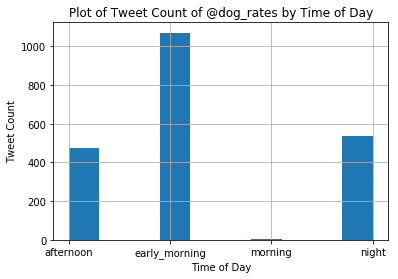

In [67]:
df_archive_copy.time_category.hist();
plt.xlabel('Time of Day');
plt.ylabel('Tweet Count');
plt.title('Plot of Tweet Count of @dog_rates by Time of Day');

#### What time of day did @dog_rates have the highest retweet, highest retweets on average, lowest retweet?

In [68]:
# Get max retweet counts for each time category
retweet_counts_max = df_archive_copy.groupby('time_category').retweet_count.max().values
time_category_max = df_archive_copy.groupby('time_category').retweet_count.max().index

# Get mean retweet counts for each time category
retweet_counts_avg = df_archive_copy.groupby('time_category').retweet_count.mean().values
time_category_avg = df_archive_copy.groupby('time_category').retweet_count.mean().index

# Get min retweet counts for each time category
retweet_counts_min = df_archive_copy.groupby('time_category').retweet_count.min().values
time_category_min = df_archive_copy.groupby('time_category').retweet_count.min().index

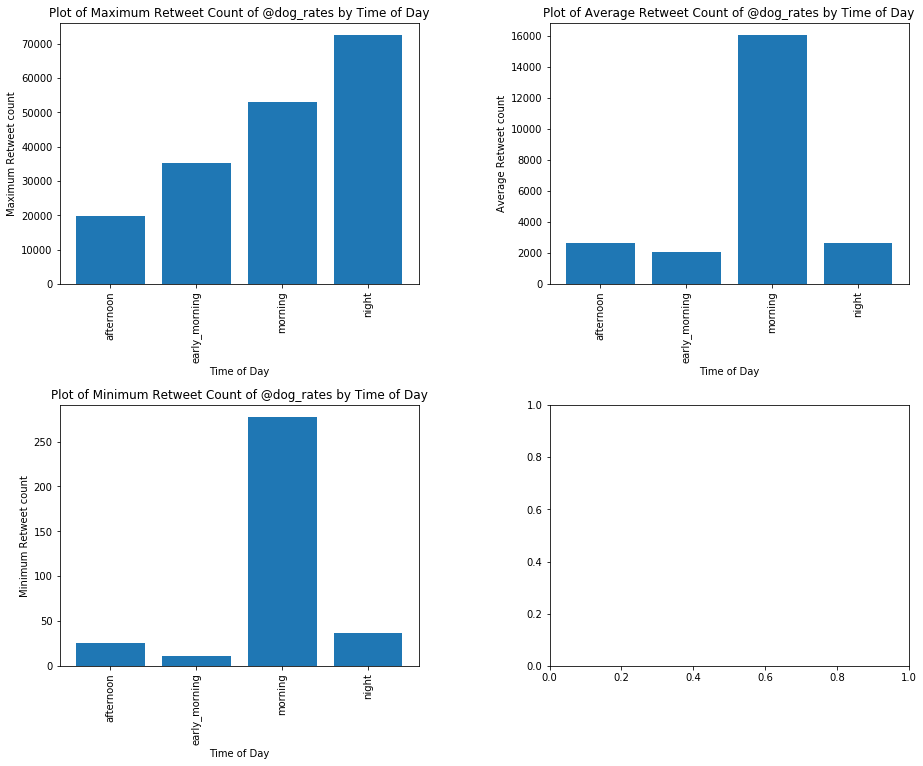

In [69]:
# Plotting with plt.subplot
fig, axs = plt.subplots(2, 2, figsize=(15, 12))
fig.tight_layout(pad=10.0)

# Maximum retweet count
axs[0][0].bar(time_category_max, retweet_counts_max);
axs[0][0].set_title('Plot of Maximum Retweet Count of @dog_rates by Time of Day');
axs[0][0].set(xlabel='Time of Day', ylabel='Maximum Retweet count');
axs[0][0].tick_params(axis='x', rotation=90);

# Average retweet count
axs[0][1].bar(time_category_avg, retweet_counts_avg);
axs[0][1].set_title('Plot of Average Retweet Count of @dog_rates by Time of Day');
axs[0][1].set(xlabel='Time of Day', ylabel='Average Retweet count');
axs[0][1].tick_params(axis='x', rotation=90);

# Minimum retweet count
axs[1][0].bar(time_category_min, retweet_counts_min);
axs[1][0].set_title('Plot of Minimum Retweet Count of @dog_rates by Time of Day');
axs[1][0].set(xlabel='Time of Day', ylabel='Minimum Retweet count');
axs[1][0].tick_params(axis='x', rotation=90);

#### What year did @dog_rates get his most retweets on average?

In [71]:
# Add year to DataFrame
df_archive_copy['year'] = df_archive_copy.timestamp.dt.year

# Get average retweet counts for each year category
retweet_counts_year = df_archive_copy.groupby('year').retweet_count.mean().values
year_category = df_archive_copy.groupby('year').retweet_count.mean().index

retweet_counts_year, year_category

(array([  912.12143928,  2369.28435115,  4952.33783784]),
 Int64Index([2015, 2016, 2017], dtype='int64', name='year'))

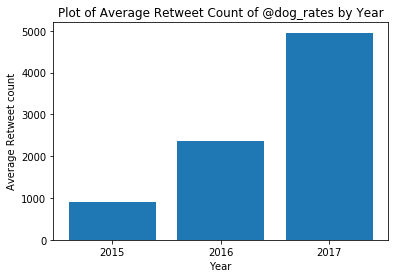

In [72]:
# Plotting
year_label = ['2015', '2016', '2017']

plt.bar(year_category, retweet_counts_year);
plt.title('Plot of Average Retweet Count of @dog_rates by Year');
plt.xlabel('Year');
plt.xticks(year_category, year_label)
plt.ylabel('Average Retweet count');

#### What month does @dog_rates get his most retweets on average?

In [73]:
# Add month to DataFrame
df_archive_copy['month'] = df_archive_copy.timestamp.dt.month

month_label = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Get average retweet counts for each year category
retweet_counts_month = df_archive_copy.groupby('month').retweet_count.mean().values
month_category = df_archive_copy.groupby('month').retweet_count.mean().index

retweet_counts_month, month_category

(array([ 2404.57142857,  2079.74731183,  2145.7032967 ,  2775.06862745,
         3826.96078431,  4258.69343066,  3599.91780822,  3040.41935484,
         2949.05882353,  3896.70422535,   996.73428571,  1741.1147541 ]),
 Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int64', name='month'))

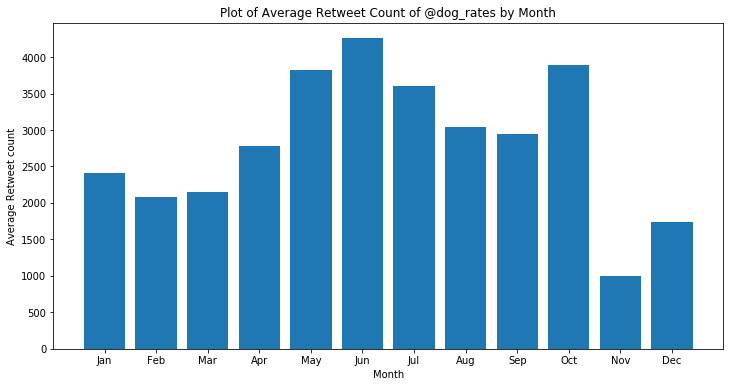

In [74]:
plt.figure(figsize=(12, 6))
plt.bar(month_category, retweet_counts_month);
plt.title('Plot of Average Retweet Count of @dog_rates by Month');
plt.xlabel('Month');
plt.xticks(month_category, month_label)
plt.ylabel('Average Retweet count');

#### What dog stage gets the most `rating_numerator` on average from @dog_rates?

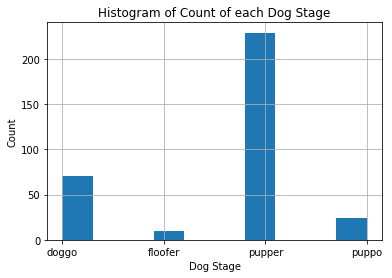

In [75]:
# First, plot histogram of count of each dog stage
df_archive_copy.dog_stage.hist();
plt.xlabel('Dog Stage');
plt.ylabel('Count');
plt.title('Histogram of Count of each Dog Stage');

In [76]:
# Get average rating_numerator for each dog_stage
avg_rating_numerator = df_archive_copy.groupby('dog_stage').rating_numerator.mean().values
dog_stage_category = df_archive_copy.groupby('dog_stage').rating_numerator.mean().index

dog_stage_category, avg_rating_numerator

(Index(['doggo', 'floofer', 'pupper', 'puppo'], dtype='object', name='dog_stage'),
 array([ 11.83098592,  11.8       ,  10.75227074,  12.04166667]))

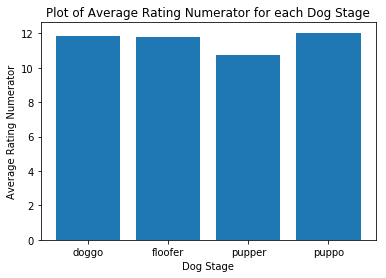

In [77]:
# Ploting average rating_numerator for each dog stage
plt.bar(dog_stage_category, avg_rating_numerator);
plt.title('Plot of Average Rating Numerator for each Dog Stage');
plt.xlabel('Dog Stage');
plt.ylabel('Average Rating Numerator');

### Insights:
1. @dog_rates Tweets majorly in the early hours of the morning time range of around `[00:00:00 - 06:00:00)`

2. @dog_rates seems to be getting high retweets around morning, time range around `[06:00:00 - 12:00:00)`, but this might be due to the very few tweets he has for this time range, about 4 tweets, and so there is not soo much to get an average on. However, he did get his highest retweet at night.

3. @dog_rates retweets increases as the years go by, which is a trend we would expect as his followers increase, but he seems to get his most retweets in the months of `June` and his least in `November`.

4. Each dog stage got roughly the same rating numerator from @dog_rates, although `pupper` is slightly less.